In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, chi2
np.random.seed(45)


import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from xgboost import XGBClassifier





from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import svm


from spellchecker import SpellChecker
import itertools
 

In [2]:
train_df= pd.read_csv('development.csv', sep=',')
test_df=pd.read_csv('evaluation.csv', sep=',')
train_df

,sentiment,ids,date,flag,user,text
0,1,1833972543,Mon May 18 01:08:27 PDT 2009,NO_QUERY,Killandra,"@MissBianca76 Yes, talking helps a lot.. going..."
1,1,1980318193,Sun May 31 06:23:17 PDT 2009,NO_QUERY,IMlisacowan,SUNSHINE. livingg itttt. imma lie on the grass...
2,1,1994409198,Mon Jun 01 11:52:54 PDT 2009,NO_QUERY,yaseminx3,@PleaseBeMine Something for your iphone
3,0,1824749377,Sun May 17 02:45:34 PDT 2009,NO_QUERY,no_surprises,@GabrielSaporta couldn't get in to the after p...
4,0,2001199113,Tue Jun 02 00:08:07 PDT 2009,NO_QUERY,Rhi_ShortStack,@bradiewebbstack awww is andy being mean again...
...,...,...,...,...,...,...
224989,0,2261324310,Sat Jun 20 20:36:48 PDT 2009,NO_QUERY,CynthiaBuroughs,@Dropsofreign yeah I hope Iran people reach fr...
224990,1,1989408152,Mon Jun 01 01:25:45 PDT 2009,NO_QUERY,unitechy,Trying the qwerty keypad
224991,0,1991221316,Mon Jun 01 06:38:10 PDT 2009,NO_QUERY,Xaan,I love Jasper &amp; Jackson but that wig in th...
224992,0,2239702807,Fri Jun 19 08:51:56 PDT 2009,NO_QUERY,Ginger_Billie,I am really tired and bored and bleh! I feel c...


##Null entries check

In [3]:
print(train_df.isnull().values.any())
print(test_df.isnull().values.any())



False
False


#check unuseful columns

In [4]:
print(train_df.flag.unique())
print(test_df.flag.unique())


train_df=train_df.drop(columns=['flag'])
test_df=test_df.drop(columns=['flag'])

train_df

['NO_QUERY']
['NO_QUERY']


,sentiment,ids,date,user,text
0,1,1833972543,Mon May 18 01:08:27 PDT 2009,Killandra,"@MissBianca76 Yes, talking helps a lot.. going..."
1,1,1980318193,Sun May 31 06:23:17 PDT 2009,IMlisacowan,SUNSHINE. livingg itttt. imma lie on the grass...
2,1,1994409198,Mon Jun 01 11:52:54 PDT 2009,yaseminx3,@PleaseBeMine Something for your iphone
3,0,1824749377,Sun May 17 02:45:34 PDT 2009,no_surprises,@GabrielSaporta couldn't get in to the after p...
4,0,2001199113,Tue Jun 02 00:08:07 PDT 2009,Rhi_ShortStack,@bradiewebbstack awww is andy being mean again...
...,...,...,...,...,...
224989,0,2261324310,Sat Jun 20 20:36:48 PDT 2009,CynthiaBuroughs,@Dropsofreign yeah I hope Iran people reach fr...
224990,1,1989408152,Mon Jun 01 01:25:45 PDT 2009,unitechy,Trying the qwerty keypad
224991,0,1991221316,Mon Jun 01 06:38:10 PDT 2009,Xaan,I love Jasper &amp; Jackson but that wig in th...
224992,0,2239702807,Fri Jun 19 08:51:56 PDT 2009,Ginger_Billie,I am really tired and bored and bleh! I feel c...


##Removing rows containing unreadable characters


##Dropping unuseful columns


In [5]:
train_df=train_df.drop(columns=['ids','date','user'])
test_df=test_df.drop(columns=['ids','date','user'])

train_df

,sentiment,text
0,1,"@MissBianca76 Yes, talking helps a lot.. going..."
1,1,SUNSHINE. livingg itttt. imma lie on the grass...
2,1,@PleaseBeMine Something for your iphone
3,0,@GabrielSaporta couldn't get in to the after p...
4,0,@bradiewebbstack awww is andy being mean again...
...,...,...
224989,0,@Dropsofreign yeah I hope Iran people reach fr...
224990,1,Trying the qwerty keypad
224991,0,I love Jasper &amp; Jackson but that wig in th...
224992,0,I am really tired and bored and bleh! I feel c...


##Counting the number of positive and negative reviews

In [6]:
positive_tw = train_df.loc[(train_df['sentiment']==1),:].shape[0]
negative_tw = train_df.loc[(train_df['sentiment']==0),:].shape[0]

print('number of positive sentiment entries is:{}'.format(str(positive_tw)))
print('number of negative sentiment entries is:{}'.format(str(negative_tw)))



number of positive sentiment entries is:130157
number of negative sentiment entries is:94837


##Print the most frequent word



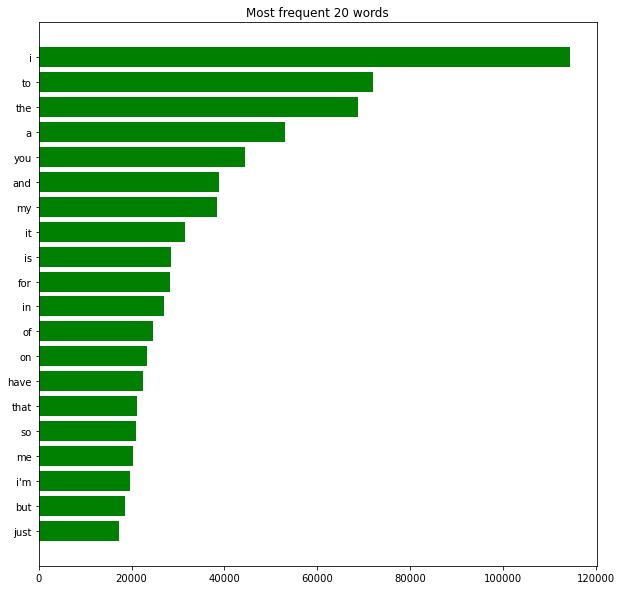

In [7]:
entries = pd.Series(" ".join(train_df['text']).lower().split()).value_counts()

most_freq_num= 20

fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(entries.index[:most_freq_num], entries[:most_freq_num], align='center',color='green')
ax.set_title(f"Most frequent {most_freq_num} words")
plt.gca().invert_yaxis()

plt.show()

##Separate x from y

In [8]:
X_train = train_df.loc[:,['text']]
y_train = train_df.loc[:,['sentiment']]
X_test= test_df

##Data cleaning

In [9]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S238669\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
X_train['text_clean'] = X_train['text']

X_train

,text,text_clean
0,"@MissBianca76 Yes, talking helps a lot.. going...","@MissBianca76 Yes, talking helps a lot.. going..."
1,SUNSHINE. livingg itttt. imma lie on the grass...,SUNSHINE. livingg itttt. imma lie on the grass...
2,@PleaseBeMine Something for your iphone,@PleaseBeMine Something for your iphone
3,@GabrielSaporta couldn't get in to the after p...,@GabrielSaporta couldn't get in to the after p...
4,@bradiewebbstack awww is andy being mean again...,@bradiewebbstack awww is andy being mean again...
...,...,...
224989,@Dropsofreign yeah I hope Iran people reach fr...,@Dropsofreign yeah I hope Iran people reach fr...
224990,Trying the qwerty keypad,Trying the qwerty keypad
224991,I love Jasper &amp; Jackson but that wig in th...,I love Jasper &amp; Jackson but that wig in th...
224992,I am really tired and bored and bleh! I feel c...,I am really tired and bored and bleh! I feel c...


In [11]:
import re
from nltk.corpus import stopwords

stopwords_list = stopwords.words("english")

def remover(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list]
    text = ' '.join(final_list)
    return text

for index, row in X_train.iterrows():
    row['text_clean'] = re.sub('@\S+', ' ', row['text_clean']) #removing @ from names
    row['text_clean'] = re.sub(r'\s+', ' ', row['text_clean']) # Remove extra white space from text
    row['text_clean'] = re.sub(r'\W', ' ', row['text_clean']) # Remove all the special characters from text
    row['text_clean'] = re.sub(r'\s+[a-zA-Z]\s+', ' ', row['text_clean']) # Remove all single characters from text
    #row['text_clean'] = remover(row['text_clean']) # removes stopwords
    row['text_clean'] = row['text_clean'].lower() # Converting to Lowercase



##Put Words as features

In [12]:
X_train

,text,text_clean
0,"@MissBianca76 Yes, talking helps a lot.. going...",yes talking helps lot going through it th...
1,SUNSHINE. livingg itttt. imma lie on the grass...,sunshine livingg itttt imma lie on the grass...
2,@PleaseBeMine Something for your iphone,something for your iphone
3,@GabrielSaporta couldn't get in to the after p...,couldn get in to the after party
4,@bradiewebbstack awww is andy being mean again...,awww is andy being mean again now want maccas
...,...,...
224989,@Dropsofreign yeah I hope Iran people reach fr...,yeah hope iran people reach freedom they r...
224990,Trying the qwerty keypad,trying the qwerty keypad
224991,I love Jasper &amp; Jackson but that wig in th...,i love jasper amp jackson but that wig in th...
224992,I am really tired and bored and bleh! I feel c...,i am really tired and bored and bleh feel crappy


In [13]:
X_train=X_train.drop(columns=['text'])
X_test=X_test.drop(columns=['text'])

In [14]:
X_train

,text_clean
0,yes talking helps lot going through it th...
1,sunshine livingg itttt imma lie on the grass...
2,something for your iphone
3,couldn get in to the after party
4,awww is andy being mean again now want maccas
...,...
224989,yeah hope iran people reach freedom they r...
224990,trying the qwerty keypad
224991,i love jasper amp jackson but that wig in th...
224992,i am really tired and bored and bleh feel crappy


##Logistic regression 

In [15]:
tfidf = TfidfVectorizer(max_df= 0.30, min_df=0)#0.50 #0.80 , performa bene anche con 0.40 #piu' alzo min_df più funziona male #0.005 buono #provare con 0.001 e 0.0005 (0.00005  consegnato)(0.00001  consegnato 2)
X_train = tfidf.fit_transform(X_train.text_clean) #passing the cleaned text
selected_feat=tfidf.get_feature_names_out()
print(selected_feat)
print('eccolo')
#print(X_train.toarray())

#makes feature to the model 

['00' '000' '0000' ... 'øµù' 'ø¹' 'øºø']
eccolo


In [16]:
X_train.size

2591822

In [17]:
"""from sklearn.decomposition import TruncatedSVD
# prepare transform on dataset
svd.fit(X_train)
# apply transform to dataset
transformed = svd.transform(X_train)"""

'from sklearn.decomposition import TruncatedSVD\n# prepare transform on dataset\nsvd.fit(X_train)\n# apply transform to dataset\ntransformed = svd.transform(X_train)'

In [18]:
#transformed.size
#transformed

In [19]:
#using x_svd truncated

#logistic_regression = gridSearch.best_estimator_
#using SVD truncated
"""
cv_scores = cross_val_score(logistic_regression, x_svd_train, y_svd_train, cv=5, scoring='f1_macro', n_jobs=-1)
#cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1)


mean = cv_scores.mean()
std = cv_scores.std() * 2
print(f"f1_macro: {mean:.3f} (+/- {std:.3f})")"""

'\ncv_scores = cross_val_score(logistic_regression, x_svd_train, y_svd_train, cv=5, scoring=\'f1_macro\', n_jobs=-1)\n#cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring=\'f1_macro\', n_jobs=-1)\n\n\nmean = cv_scores.mean()\nstd = cv_scores.std() * 2\nprint(f"f1_macro: {mean:.3f} (+/- {std:.3f})")'

In [20]:
#Using x_train
"""
#logistic_regression = gridSearch.best_estimator_
#using SVD truncated
cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1)
#cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1)


mean = cv_scores.mean()
std = cv_scores.std() * 2
print(f"f1_macro: {mean:.3f} (+/- {std:.3f})")
"""

'\n#logistic_regression = gridSearch.best_estimator_\n#using SVD truncated\ncv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring=\'f1_macro\', n_jobs=-1)\n#cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring=\'f1_macro\', n_jobs=-1)\n\n\nmean = cv_scores.mean()\nstd = cv_scores.std() * 2\nprint(f"f1_macro: {mean:.3f} (+/- {std:.3f})")\n'

In [21]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=10000)), ('m', LogisticRegression(penalty='l2', random_state=0, C=3,fit_intercept= True, max_iter= 200, solver= 'liblinear'))]
#steps = [('svd', TruncatedSVD(n_components=14)), ('m', LinearSVC(random_state=0,C=1,loss='hinge'))]
model = Pipeline(steps=steps)
# evaluate model
# int, default=5 Number of folds. Must be at least 2.
#  int, default=10 Number of times cross-validator needs to be repeated.
#

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1)
#cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1)


mean = cv_scores.mean()
std = cv_scores.std() * 2
print(f"f1_macro: {mean:.3f} (+/- {std:.3f})")

f1_macro: nan (+/- nan)


C:\Users\S238669\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\S238669\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\S238669\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\S238669\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\S238669\

##Linear SVM

In [22]:
X

NameError: name 'X' is not defined

In [ ]:
linear_svc = LinearSVC(random_state=0,C=1,loss='hinge')

#param_grid = {'loss': ['hinge', 'squared_hinge'], 'fit_intercept': [True, False], 'C': list(range(1,10,2))}

#gridSearch = GridSearchCV(linear_svc, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)

#gridSearch.fit(X_train, y_train)

#print(gridSearch.best_params_)'''

In [ ]:
#linear_svc = gridSearch.best_estimator_

cv_scores = cross_val_score(linear_svc, X_svd, y_train, cv=5, scoring='f1_macro', n_jobs=-1)

mean = cv_scores.mean()
std = cv_scores.std() * 2
print(f"f1_macro: {mean:.3f} (+/- {std:.3f})")


##Random forest

In [ ]:

#rand_forest =  RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1,verbose=1)

#param_grid = {'n_estimators': [50, 100, 150]}

#gridSearch = GridSearchCV(rand_forest, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

#gridSearch.fit(X_train, y_train)

#print(gridSearch.best_params_)

In [ ]:


df = pd.DataFrame(data=y_to_upload)

df

df.to_csv('my_csv_res.csv',index=True)